In [1]:
# Lertas Giorgos 

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from platform import python_version
python_version()

'3.8.13'

### 1. Interractions dataframe

In [2]:
# read file with interractions and remove column with side effect polypharmacy code, because we have the names
combo=pd.read_csv('data/bio-decagon-combo.csv')
combo2 = combo.drop('Polypharmacy Side Effect', axis=1)

# Also, replace blank spaces, in names, with underscore
combo2['Side Effect Name'] = combo2['Side Effect Name'].str.replace(' ','_')
combo2

,STITCH 1,STITCH 2,Side Effect Name
0,CID000002173,CID000003345,hypermagnesemia
1,CID000002173,CID000003345,retinopathy_of_prematurity
2,CID000002173,CID000003345,atelectasis
3,CID000002173,CID000003345,alkalosis
4,CID000002173,CID000003345,Back_Ache
...,...,...,...
4649436,CID000003461,CID000003954,deep_vein_thromboses
4649437,CID000003461,CID000003954,rhabdomyolysis
4649438,CID000003461,CID000003954,loss_of_weight
4649439,CID000003461,CID000003954,ascites


,Side Effect Name
arterial_pressure_NOS_decreased,28568
anaemia,27006
Difficulty_breathing,26037
nausea,25190
neumonia,24430
Fatigue,24260
Pain,23894
diarrhea,23848
asthenia,23515
emesis,23043


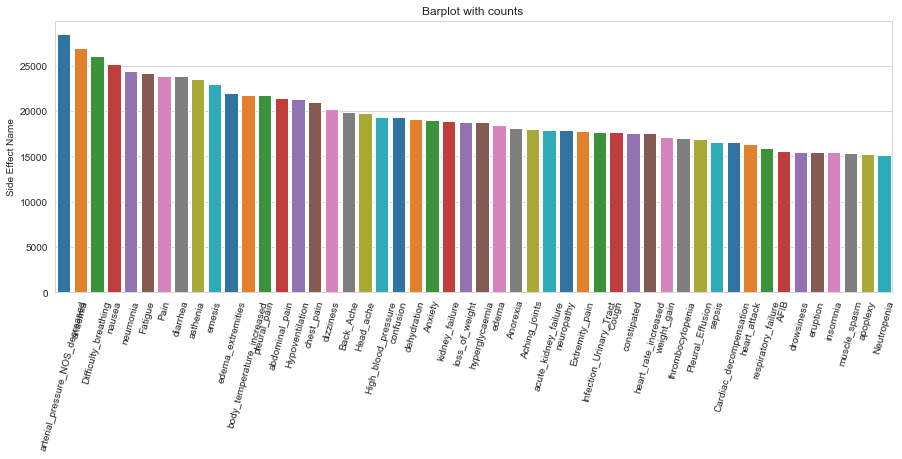

In [3]:
# counter of values at Side Effect Name column 
count_effects = pd.DataFrame(combo2['Side Effect Name'].value_counts())

# create a barplot with counts
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Barplot with counts ')
sns.barplot(x=count_effects.head(50).index, y='Side Effect Name', data=count_effects.head(50), palette='tab10')
plt.xticks(rotation=75);

# print leaderbord with names
count_effects[:15]

In [4]:
# create graph and print leaderboard with entities how many times they appear
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(combo2, 'STITCH 1', 'STITCH 2', True)

leaderboard = {}
df = pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique()
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
leaderboard = s.to_frame().sort_values('connections', ascending=False)

# print leaderbord with names
leaderboard[:20]

# print graph
# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=True)

,connections
CID000004594,599
CID000001983,578
CID000000853,576
CID000003883,552
CID000005039,549
CID000003958,544
CID000005732,537
CID000004679,537
CID000054454,537
CID000002771,536


In [5]:
# leaderbord with unique interactions how many times they appear 
inters = combo2[['STITCH 1','STITCH 2']].groupby(['STITCH 1', 'STITCH 2']).value_counts()
inters = pd.DataFrame(inters)
inters.columns = ['connections']
inters.sort_values('connections', ascending=False)[:20]

,,connections
STITCH 1,STITCH 2,
CID000003883,CID000004594,540
CID000002662,CID000003883,524
CID000004594,CID000005090,494
CID000005090,CID000005732,478
CID000002662,CID000003446,476
CID000002678,CID000004900,468
CID000003958,CID000005090,466
CID000004900,CID000005090,465
CID000002662,CID000004900,462


### 2. Disease Classes dataframe

In [6]:
# read file with subcategories, which called Disease class
effectcategories=pd.read_csv('data/bio-decagon-effectcategories.csv')
effectcategories

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
1,C0027858,neuroma,benign neoplasm
2,C0041466,Typhoid,bacterial infectious disease
3,C0032807,Post thrombotic syndrome,cardiovascular system disease
4,C0033860,psoriasis,integumentary system disease
...,...,...,...
556,C0001816,agnosia,developmental disorder of mental health
557,C0302592,carcinoma of the cervix,cancer
558,C0270629,epidural abscess,nervous system disease
559,C0038220,status epilepticus,nervous system disease


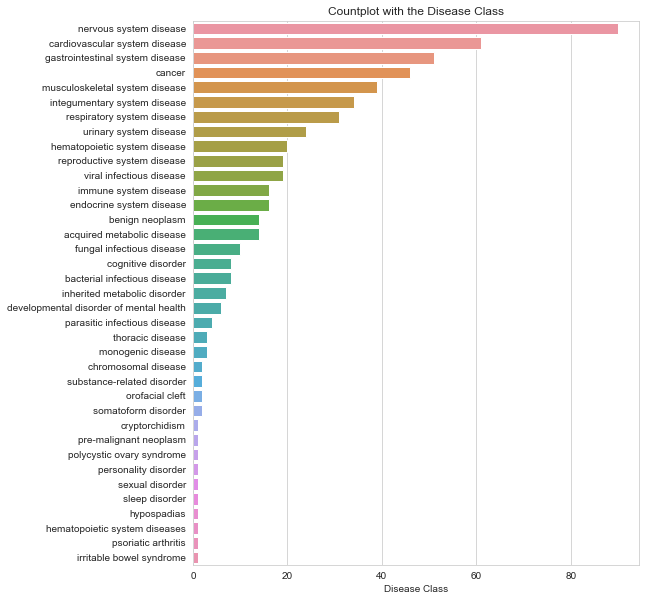

In [7]:
# counter of values at Disease Class column 
count_eff_cat = pd.DataFrame(effectcategories['Disease Class'].value_counts())

# Create a count chart
plt.figure(figsize=(8,10))
plt.title('Countplot with the Disease Class')
sns.barplot(x='Disease Class',y=count_eff_cat.index,data=count_eff_cat);

In [8]:
# merge file with connections with Disease class
combo2.merge(effectcategories, on='Side Effect Name').drop('Side Effect',axis=1)

,STITCH 1,STITCH 2,Side Effect Name,Disease Class
0,CID000002173,CID000003345,peliosis,hematopoietic system disease
1,CID000001302,CID000005064,peliosis,hematopoietic system disease
2,CID000002520,CID000060852,peliosis,hematopoietic system disease
3,CID000000596,CID000667490,peliosis,hematopoietic system disease
4,CID000005245,CID000005656,peliosis,hematopoietic system disease
...,...,...,...,...
827867,CID000004205,CID000034312,Rubella,viral infectious disease
827868,CID000004900,CID000005090,Rubella,viral infectious disease
827869,CID000002554,CID000028112,Rubella,viral infectious disease
827870,CID000004112,CID000004900,Rubella,viral infectious disease


### 3. DGL-KE

In [9]:
import os 

path = '/Users/giorgoslertas/Desktop/Lertas_files/data_science/Thesis/ddi_pred'
os.chdir(path)    # os.getcwd() current working file

# # create train, test and valid 
# train=combo2.sample(frac=0.8)
# test=combo2.drop(list(train.index.values), axis=0)
# valid=test.sample(frac=0.5)
# test=test.drop(list(valid.index.values), axis=0)

# extract train file as text
combo2.to_csv('dgl-ke/train.txt', header=None, index=None, sep=',')
# test.to_csv('test.txt', header=None, index=None, sep=',')
# valid.to_csv('valid.txt', header=None, index=None, sep=',')

# relations = pd.DataFrame(combo2['Side Effect Name'].unique())
# entities = pd.DataFrame(pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique())
# relations.to_csv('relations.txt', header=None, sep=',')
# entities.to_csv('entities.txt', header=None, sep=',')

####extra

--log_interval 1000 \
--neg_sample_size 200 --regularization_coef = 1e-9 --hidden_dim 400 --gamma 19,9 \
--lr 0,25 --batch_size_eval 16 --test -adv --gpu 0 --max_step 24000

In [10]:
import json
  
# Opening json file
f = open('ckpts/TransE_ddi_pr_0/config.json')
  
# returns json object as a dictionary
model = json.load(f)
model

{'dataset': 'ddi_pr',
 'model': 'TransE',
 'emb_size': 400,
 'max_train_step': 80000,
 'batch_size': 1024,
 'neg_sample_size': 256,
 'lr': 0.01,
 'gamma': 12.0,
 'double_ent': False,
 'double_rel': False,
 'neg_adversarial_sampling': False,
 'adversarial_temperature': 1.0,
 'regularization_coef': 2e-06,
 'regularization_norm': 3,
 'emap_file': 'entities.tsv',
 'rmap_file': 'relations.tsv'}

In [11]:
# read files with names, that export with the code in cmd from dgl-ke
entities = pd.read_csv('dgl-ke/entities.tsv', names = ['names'], index_col=None)
relations = pd.read_csv('dgl-ke/relations.tsv', names = ['names'], index_col=None)

# read files with embeddings, that export with the code in cmd from dgl-ke
entities_emb = np.load('ckpts/TransE_ddi_pr_0/ddi_pr_TransE_entity.npy')
relations_emb = np.load('ckpts/TransE_ddi_pr_0/ddi_pr_TransE_relation.npy')

Embeddings :

entities_emb.shape
(645, 400)

relations_emb.shape
(1317, 400)

### 4. Create X

In [12]:
# 1. Select rows with top 5 relations                             # 131.231
top5 = combo2[combo2['Side Effect Name'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])]
# 2. find number of unique rows                                   # 54.449
top5_uni = top5[['STITCH 1','STITCH 2']].drop_duplicates()
# 3. sampling 10% of the unique interractions                      # 5.445
X_names = top5_uni.sample(frac=0.1)
X_names.sort_values(by=['STITCH 1','STITCH 2'])
X_names = X_names.reset_index().drop('index', axis=1)
X_names

,STITCH 1,STITCH 2
0,CID000003373,CID000003440
1,CID000004173,CID000006691
2,CID000003325,CID000004740
3,CID000003325,CID000077999
4,CID000072054,CID000152945
...,...,...
5440,CID000002812,CID000004409
5441,CID000003696,CID000006691
5442,CID000003008,CID000004679
5443,CID000003911,CID000004829


In [13]:
# function to create X values 
def export_X(X):
    
    # for each drug, add embeddings from the exported file of dgl-ke
    x1 = [entities_emb[entities[entities.names == i].index] for i in X['STITCH 1']]
    x2 = [entities_emb[entities[entities.names == i].index] for i in X['STITCH 2']]
    
    # reshape all to 2d matrix
    x1 = np.reshape(x1, (len(x1), 400))
    x2 = np.reshape(x2, (len(x2), 400))
    
    # create X values with concatenation of 2 files with interracted drugs
    x = [np.concatenate([sub1,sub2]) for sub1, sub2 in zip(x1, x2)]
    x = pd.DataFrame(np.transpose(x))
    
    return x

X ∈ R (d×m)  ...  where d is the dimensionality of the data, and m is the number of instances.

In [14]:
X = export_X(X_names)
X

,0,1,2,3,4,5,6,7,8,9,...,5435,5436,5437,5438,5439,5440,5441,5442,5443,5444
0,0.485174,-0.432981,-0.482400,-0.482400,-0.457894,0.546209,0.234781,-0.559497,0.062625,-0.389620,...,0.339295,0.510435,-0.526935,-0.331032,-0.347306,-0.447670,-0.483962,-0.507968,-0.350487,0.223645
1,-0.531545,0.503700,0.313210,0.313210,0.520239,0.538933,-0.282722,0.502685,-0.583785,0.406237,...,-0.549194,0.290208,-0.507935,0.481577,-0.496041,0.359830,0.380627,0.440165,-0.641760,0.136328
2,-0.484499,-0.181562,-0.419840,-0.419840,-0.457366,-0.549066,-0.375648,0.484005,-0.205998,-0.088162,...,-0.512362,0.441425,0.292399,-0.506894,0.290017,0.461861,0.239586,0.507406,0.452264,0.031278
3,-0.676846,-0.437968,0.388779,0.388779,-0.243019,-0.590988,0.260617,-0.445829,-0.046779,-0.388243,...,-0.515898,-0.511912,-0.156797,0.402499,-0.119854,-0.482460,0.461629,0.288693,0.408256,0.009889
4,-0.470580,0.391138,-0.428268,-0.428268,-0.529647,0.431433,0.163855,-0.453763,-0.414170,0.213054,...,-0.476716,0.555728,-0.112970,0.667733,-0.192315,0.691729,-0.428296,0.470821,0.384262,0.348720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.431525,-0.395675,-0.464194,0.230546,-0.316133,0.230546,-0.486568,-0.034666,0.512352,0.345135,...,-0.224824,0.314192,-0.224824,-0.282231,0.386364,-0.343339,-0.395675,0.210690,-0.370426,-0.522703
796,-0.272632,-0.055358,0.462768,0.346229,-0.434117,0.346229,-0.044752,0.495159,-0.139032,-0.398609,...,-0.248549,0.330468,-0.248549,0.336993,0.509010,0.132587,-0.055358,-0.391437,0.334971,0.195389
797,-0.383904,0.429962,-0.318999,-0.398115,0.426769,-0.398115,0.355524,0.276107,0.315502,0.056209,...,-0.195843,0.536689,-0.195843,0.068021,-0.347247,0.058513,0.429962,0.124872,-0.094142,0.262917
798,0.239267,-0.216421,-0.248763,-0.406442,0.028368,-0.406442,0.060122,-0.438071,0.583152,0.538618,...,-0.498369,0.340437,-0.498369,-0.102154,-0.045853,0.272854,-0.216421,-0.142474,0.419487,0.394026


### 5. Create Y

Y ∈ {−1, 1}m×z  ...  m is the number of instances, and z the classes. 

In [15]:
Y_names = top5.set_index(['STITCH 1','STITCH 2'])['Side Effect Name'].str.get_dummies().groupby(['STITCH 1','STITCH 2']).max()
Y = Y_names.reset_index()
Y = pd.merge(X_names, Y, on=['STITCH 1', 'STITCH 2'])
Y = Y.drop(['STITCH 1', 'STITCH 2'], axis=1)
Y[Y == 0] = -1
Y

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,1,-1,-1,-1,1
1,-1,1,1,-1,-1
2,-1,1,1,1,-1
3,1,1,-1,1,1
4,-1,-1,1,-1,-1
...,...,...,...,...,...
5440,-1,1,-1,-1,-1
5441,1,-1,-1,1,-1
5442,-1,1,-1,-1,1
5443,1,1,1,-1,-1


### 6. Biobert & create S

In [16]:
# read file with biobert embeddings
bio_embs = pd.read_csv('bio_embeddings/embeddings.csv')

# Also, replace blank spaces, in names, with underscore
bio_embs['relations'] = bio_embs['relations'].str.replace(' ','_')
bio_embs

,relations,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,hypermagnesemia,0.088074,-0.055262,0.134172,-0.090707,-0.217207,-0.186781,-0.024032,0.277330,-0.402590,...,-0.019452,0.041471,-0.132348,0.132115,0.058661,-0.038794,0.426149,-0.036876,0.008565,-0.018814
1,retinopathy_of_prematurity,-0.329204,-0.016536,-0.008062,-0.088111,-0.031477,0.122630,0.049380,0.333087,0.086270,...,0.262807,-0.204477,-0.151278,0.117630,-0.093622,0.347138,0.118548,0.121198,-0.101342,0.112632
2,atelectasis,0.337109,0.010530,-0.172739,-0.210605,-0.393780,0.200895,-0.042212,0.144598,0.009641,...,0.042049,0.320456,-0.048014,0.176009,-0.156481,0.055710,-0.020731,-0.098135,-0.100952,-0.130569
3,alkalosis,-0.030430,-0.245631,-0.131618,-0.060774,-0.252524,-0.061352,-0.022995,0.242525,-0.050651,...,-0.166825,0.331410,-0.333679,0.108219,-0.322264,0.192892,0.117852,-0.000722,0.085849,0.206449
4,Back_Ache,0.391526,0.112049,-0.280322,0.024567,-0.451858,0.025522,0.027804,0.164017,0.156766,...,-0.257412,0.301215,-0.090434,-0.024340,-0.008226,0.174115,0.337543,-0.207418,0.078398,-0.024546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,splinter,0.155755,-0.201958,0.014882,0.001103,-0.050607,-0.196756,0.011838,0.200970,-0.065509,...,0.018151,0.447372,-0.203281,0.163940,-0.162343,-0.110279,0.493734,-0.063204,0.200920,0.206374
1313,hypogonadotropic_hypogonadism,-0.079468,0.113548,0.425801,0.017825,-0.122827,-0.063751,0.088885,0.355229,-0.302494,...,0.118147,-0.336383,-0.143909,0.218631,0.009120,-0.351169,0.614995,0.158766,0.230997,-0.420567
1314,chloasma,0.321892,-0.576645,-0.075235,-0.221101,-0.109898,-0.121364,0.271159,0.132595,0.183179,...,-0.098797,-0.069401,0.007005,0.049545,-0.095278,0.033671,0.343034,0.083172,0.029176,-0.170607
1315,estrogen_replacement,0.123171,-0.072414,-0.023643,0.366200,-0.371677,0.151155,0.056889,0.007559,-0.112339,...,-0.165975,0.068254,-0.359026,0.376346,-0.047277,0.041628,0.645992,-0.096540,0.244447,-0.328027


S ∈ [0,1]a×z  ...  there are z classes, each of them having a signature composed of a attributes.

In [17]:
# collect only the relations that we use and transpose them because of  S ∈ a×z
S = bio_embs[bio_embs['relations'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])].T
S

,29,51,68,74,361
relations,Difficulty_breathing,arterial_pressure_NOS_decreased,neumonia,anaemia,nausea
0,-0.249892,-0.058238,0.147399,0.106161,0.27445
1,0.030361,-0.273673,0.026532,0.094563,-0.029486
2,-0.035144,-0.102084,-0.234816,0.031915,-0.331503
3,-0.267908,0.041894,-0.139893,0.035245,-0.219903
...,...,...,...,...,...
763,0.492388,0.04101,0.35645,0.440824,0.305742
764,0.017255,-0.020288,-0.140148,0.138147,-0.023207
765,0.047133,-0.157604,-0.044005,-0.423736,-0.506835
766,0.40698,-0.134091,-0.21131,0.135746,0.197422


In [18]:
S.columns = S.loc['relations'].values
S = S.drop(index=('relations'))
S = S[Y.columns]#.astype(float)
S

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,-0.249892,0.106161,-0.058238,0.27445,0.147399
1,0.030361,0.094563,-0.273673,-0.029486,0.026532
2,-0.035144,0.031915,-0.102084,-0.331503,-0.234816
3,-0.267908,0.035245,0.041894,-0.219903,-0.139893
4,-0.135543,-0.335823,-0.116004,-0.461992,-0.456806
...,...,...,...,...,...
763,0.492388,0.440824,0.04101,0.305742,0.35645
764,0.017255,0.138147,-0.020288,-0.023207,-0.140148
765,0.047133,-0.423736,-0.157604,-0.506835,-0.044005
766,0.40698,0.135746,-0.134091,0.197422,-0.21131


### 7. function for V

W = V * S.T, where V ∈ R(d×a) (d=800(dd_emb->400*2), a=768(biobert embeddings))

In [19]:
# function to calculate V values
def calculate_V(X,Y,S,gamma=1,lamda=1):
    
    # create I table with len(X) dimensions. I table has on the diagonal of the ace and the other numbers are 0
    I = np.eye(len(X))
    part_1 = np.linalg.inv((X.dot(X.T)+gamma*I))

    # fix columns be in same row as Y columns
    S = S[Y.columns].astype(float)
    part_2 = X.dot(Y).dot(S.T)
    
    # create I table with len(S) dimensions. I table has on the diagonal of the ace and the other numbers are 0
    I = np.eye(len(S))
    part_3 = np.linalg.inv((S.dot(S.T)+lamda*I))
    
    # calculate V
    V = part_1.dot(part_2).dot(part_3)
    V = pd.DataFrame(V)
    
    return V

In [20]:
V = calculate_V(X,Y,S)
V

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.002012,0.000460,0.001345,-0.000005,0.001206,-0.002139,0.001127,0.000229,-0.000818,0.001824,...,0.001255,-0.000145,0.000863,0.001211,-0.001240,0.000833,0.000127,0.002454,0.000406,0.000465
1,0.003823,0.000473,-0.002165,-0.000017,-0.002822,0.005182,-0.000579,0.000306,-0.000481,-0.004379,...,-0.000121,-0.002434,0.001967,0.000351,0.003917,-0.000682,-0.000853,-0.002381,-0.002374,-0.000005
2,-0.000436,0.000470,0.000633,0.000049,0.000397,-0.000846,0.000130,-0.000530,0.000309,0.000527,...,0.000087,-0.000319,0.000334,0.000506,-0.000378,0.000416,0.000356,0.000208,0.000735,0.000339
3,0.004826,0.001281,-0.001493,0.000976,-0.003775,0.005177,0.000355,-0.000355,-0.000626,-0.004829,...,-0.000275,-0.003897,0.002920,0.000790,0.004670,0.000184,-0.000148,-0.004035,-0.002759,-0.000287
4,0.000732,-0.000214,0.000868,0.001857,-0.000028,0.000253,0.001421,0.000227,-0.001090,-0.000041,...,0.000142,-0.000920,0.000014,-0.001308,0.000494,-0.000745,0.000601,-0.001300,-0.001682,-0.000890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.001229,-0.000897,-0.001733,-0.000530,-0.000632,0.002589,-0.001065,0.000854,-0.000126,-0.001715,...,-0.000287,0.000502,-0.000580,-0.001031,0.001172,-0.001429,-0.000932,-0.000388,-0.001140,-0.000221
796,0.003827,0.001354,-0.000782,0.001302,-0.003192,0.004512,0.001521,0.000372,-0.001936,-0.004038,...,0.000907,-0.004278,0.003732,0.001299,0.004356,0.000325,-0.000303,-0.002323,-0.003575,-0.000248
797,0.000216,-0.001998,-0.000444,0.000834,0.001041,0.000297,-0.000792,0.000477,0.000415,0.000428,...,-0.001285,0.002198,-0.003286,-0.003683,-0.000826,-0.002547,0.000140,-0.001448,-0.000521,-0.001190
798,0.000786,0.000723,0.000407,0.000670,-0.000659,0.000600,0.000858,-0.000176,-0.000602,-0.000693,...,0.000435,-0.001596,0.001396,0.000670,0.000999,0.000421,0.000240,-0.000560,-0.000786,0.000030


### 8. Prediction

In [21]:
# sample from data 
x_sample = X_names.sample(1) #.drop(top5_sample.index, axis=0)
# export X values from the sample
x = export_X(x_sample)
# calculate the preds the sample
values = x.T.dot(V).dot(S.values)
values.columns = S.columns
values

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,-0.098748,-0.138034,0.060868,-0.11098,-0.614193


In [22]:
# prin the max 
values.iloc[:,[np.argmax(values)]]

,arterial_pressure_NOS_decreased
0,0.060868


In [23]:
values.T.sort_values(by =0 ,axis =0, ascending=False)

,0
arterial_pressure_NOS_decreased,0.060868
Difficulty_breathing,-0.098748
nausea,-0.11098
anaemia,-0.138034
neumonia,-0.614193


In [24]:
x_sample

,STITCH 1,STITCH 2
4477,CID000038904,CID000125889


In [25]:
# find the rows in data with the sample's drugs
n = combo2[(combo2['STITCH 1']==x_sample['STITCH 1'].iloc[0]) & (combo2['STITCH 2']==x_sample['STITCH 2'].iloc[0])]
n

,STITCH 1,STITCH 2,Side Effect Name
3618085,CID000038904,CID000125889,loss_of_weight
3618086,CID000038904,CID000125889,paronychia
3618087,CID000038904,CID000125889,angioedema
3618088,CID000038904,CID000125889,Paraesthesia
3618089,CID000038904,CID000125889,Lyell
3618090,CID000038904,CID000125889,tremor
3618091,CID000038904,CID000125889,Parkinson
3618092,CID000038904,CID000125889,agitated
3618093,CID000038904,CID000125889,chill
3618094,CID000038904,CID000125889,peliosis


In [26]:
# add a number from the indices of the drugs 
# take with n.index[0], one row with drug-drug interractions from sample
x_sample = pd.DataFrame(combo2.iloc[n.index[0]]).T

f = combo2.loc[combo2['STITCH 1'].isin(x_sample['STITCH 1']) & combo2['STITCH 2'].isin(x_sample['STITCH 2'])]
f[f['Side Effect Name'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])]

,STITCH 1,STITCH 2,Side Effect Name
3618108,CID000038904,CID000125889,anaemia


### 9. NN

In [27]:
test = Y.replace(-1, 0)
test

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,1,0,0,0,1
1,0,1,1,0,0
2,0,1,1,1,0
3,1,1,0,1,1
4,0,0,1,0,0
...,...,...,...,...,...
5440,0,1,0,0,0
5441,1,0,0,1,0
5442,0,1,0,0,1
5443,1,1,1,0,0


In [28]:
# export X values from the sample
x = export_X(X_names)

# calculate the preds from the sample
train = x.T.dot(V).dot(S.values)
train.columns = test.columns
train

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,0.580042,0.097995,0.09141,-0.445577,0.298993
1,0.341142,0.196898,0.013947,-0.0205,-0.281578
2,-0.266423,0.103739,0.163518,0.643044,-0.395489
3,-0.12766,0.381596,-0.415026,0.047994,-0.104227
4,-0.992969,-0.287595,0.668227,-1.301988,-0.144326
...,...,...,...,...,...
5440,-0.280721,-0.243691,-0.627144,-0.019807,-0.113985
5441,-0.160835,0.145763,-0.018234,0.148375,-0.791257
5442,-0.201988,0.341031,-0.396752,-0.296635,-0.222599
5443,-0.074199,0.460608,-0.357975,-0.547677,-0.128989


In [29]:
from sklearn.model_selection import train_test_split

# create train and test
train = train.to_numpy().astype('float32')
test = test.to_numpy().astype('int32')

# set aside 30% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(train, test,
                                                    test_size=0.3, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.15, random_state= 8) # 0.15 x 0.7 = 0.105, 10.5% of data

                                                                                   # 0.85 x 0.7 = 0.105, 59.5% of data
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (3239, 5)
y_train shape: (3239, 5)
X_test shape: (1634, 5)
y_test shape: (1634, 5)
X_val shape: (572, 5)
y_val shape: (572, 5)


In [30]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# create neural network model to predict non-exclusive classes
def nn_model():
    model = Sequential()
    model.add(Dense(units=5,activation='relu'))
    model.add(Dense(units=15,activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(units=10,activation='relu'))
    model.add(Dense(units=5,activation='sigmoid'))

    
    # For a binary classification problem
    model.compile(optimizer='adam', loss='binary_crossentropy') # metrics=['accuracy']
    
    return model

In [31]:
# simple early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model = nn_model()
# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 150, verbose = 1, 
          validation_data = (X_test, y_test))#, callbacks=[early_stop])

Epoch 1/150


2022-07-11 13:26:56.779444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


102/102 [==============================] - 1s 5ms/step - loss: 0.6897 - val_loss: 0.6789
Epoch 2/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6697 - val_loss: 0.6602
Epoch 3/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6453 - val_loss: 0.6349
Epoch 4/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6236 - val_loss: 0.6195
Epoch 5/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.6104
Epoch 6/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6004 - val_loss: 0.6040
Epoch 7/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5946 - val_loss: 0.5997
Epoch 8/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5898 - val_loss: 0.5966
Epoch 9/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5865 - val_loss: 0.5943
Epoch 10/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5842 - val_loss: 0.5928
E

102/102 [==============================] - 0s 3ms/step - loss: 0.5479 - val_loss: 0.5623
Epoch 82/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5482 - val_loss: 0.5622
Epoch 83/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5481 - val_loss: 0.5633
Epoch 84/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5482 - val_loss: 0.5616
Epoch 85/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5478 - val_loss: 0.5625
Epoch 86/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5478 - val_loss: 0.5639
Epoch 87/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5480 - val_loss: 0.5612
Epoch 88/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5474 - val_loss: 0.5619
Epoch 89/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5478 - val_loss: 0.5607
Epoch 90/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5480 - val_loss: 

In [32]:
# Here we can see parameters and output shapes in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 15)                90        
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.metrics_names

['loss']

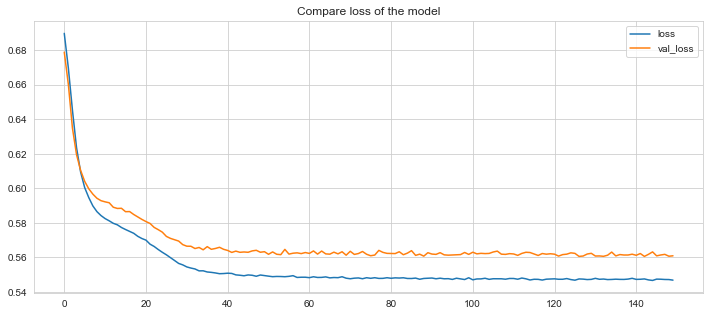

In [34]:
# model comparison of loss and accuracy between train and test 
model_loss = pd.DataFrame(model.history.history)
#model_loss[['accuracy','val_accuracy']].plot(figsize=(12,5), title='Compare accuracy of the model');
model_loss[['loss','val_loss']].plot(figsize=(12,5), title='Compare loss of the model');

In [35]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_val, y_val, verbose = 0 )

print("Train loss: ", training_score)
print("Validation loss: ", test_score)
#print("Train accuracy: ", training_score[1])
#print("Test accuracy: ", test_score[1])

Train loss:  0.5463981628417969
Validation loss:  0.539955198764801


18/18 [==============================] - 0s 3ms/step
classification report:
                                  precision    recall  f1-score   support

           Difficulty_breathing       0.71      0.75      0.73       275
                        anaemia       0.74      0.81      0.77       299
arterial_pressure_NOS_decreased       0.66      0.76      0.71       274
                         nausea       0.75      0.68      0.72       298
                       neumonia       0.71      0.73      0.72       254

                      micro avg       0.71      0.75      0.73      1400
                      macro avg       0.72      0.75      0.73      1400
                   weighted avg       0.72      0.75      0.73      1400
                    samples avg       0.70      0.74      0.68      1400



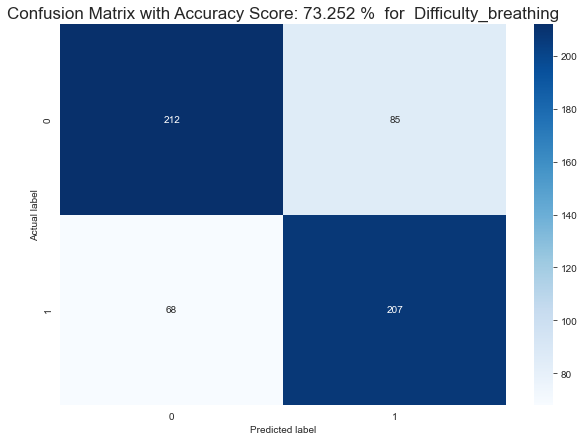

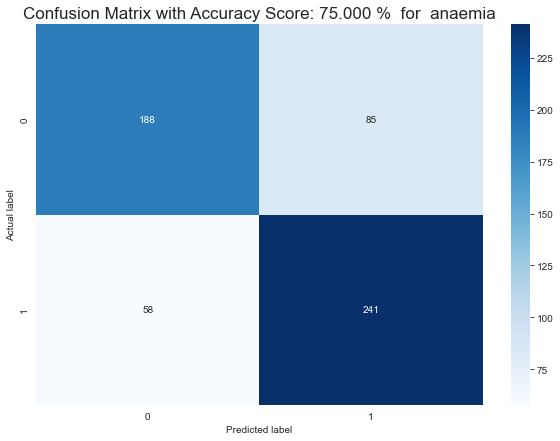

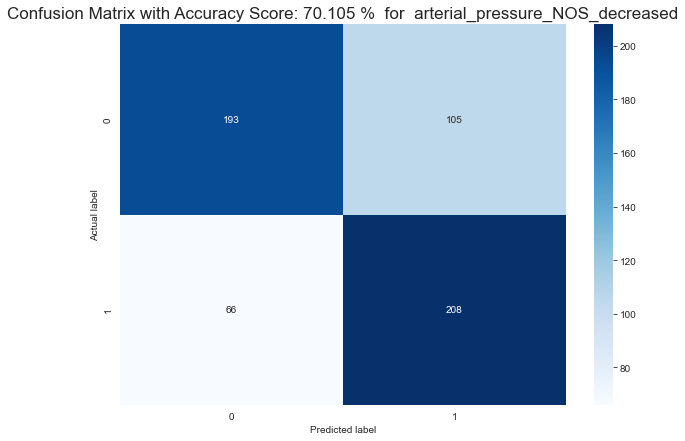

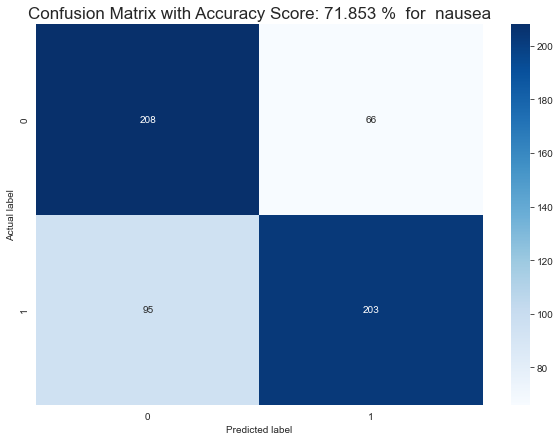

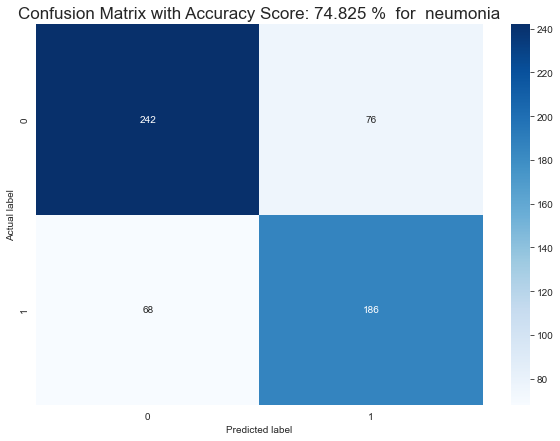

In [36]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def report(y_test, predictions, target):
    print('classification report:\n',classification_report(y_test,predictions, target_names=target, zero_division=0))
    
    # confusion matrix on heatmap
    matrix = multilabel_confusion_matrix(y_test,predictions)
    for i,j in enumerate(matrix):
        plt.figure(figsize=(10,7))
        sns.heatmap(j, annot=True,fmt="d",cmap='Blues')#, annot=True, fmt='.5g', cmap = 'Blues_r', xticklabels=target, yticklabels=target);
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        title = f'Confusion Matrix with Accuracy Score: {accuracy_score(y_test[:,i],predictions[:,i])*100:.3f} %  for  {target[i]}'
        plt.title(title, size = 17);


# predict the classes with validation data
predictions = (model.predict(X_val) > 0.5).astype("int32")
report(y_val, predictions, list(Y.columns))

In [37]:
y_val[:9,:]

array([[1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1]], dtype=int32)

In [38]:
predictions[:9,:]

array([[1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1]], dtype=int32)

52/52 [==============================] - 0s 1ms/step
classification report:
                                  precision    recall  f1-score   support

           Difficulty_breathing       0.68      0.69      0.68       774
                        anaemia       0.69      0.76      0.72       812
arterial_pressure_NOS_decreased       0.73      0.72      0.73       867
                         nausea       0.71      0.65      0.68       747
                       neumonia       0.67      0.65      0.66       724

                      micro avg       0.70      0.70      0.70      3924
                      macro avg       0.70      0.69      0.69      3924
                   weighted avg       0.70      0.70      0.70      3924
                    samples avg       0.66      0.68      0.63      3924



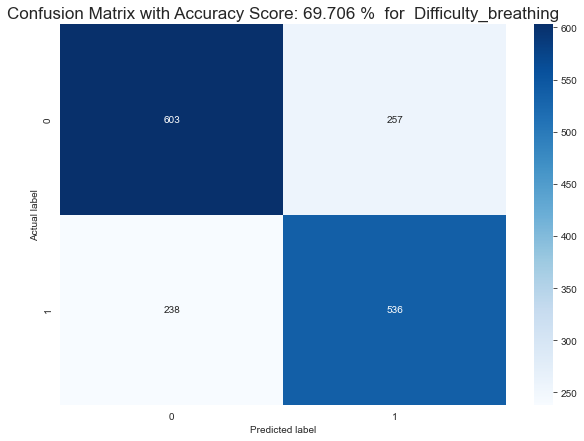

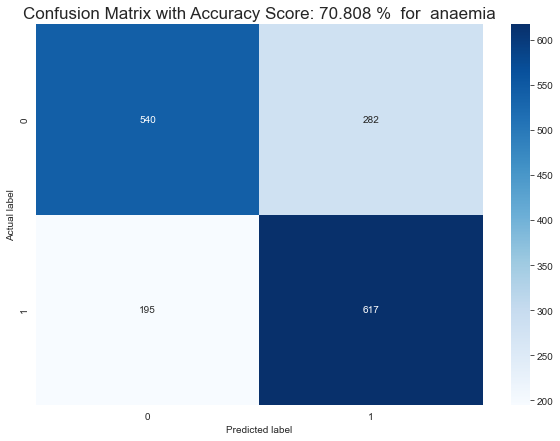

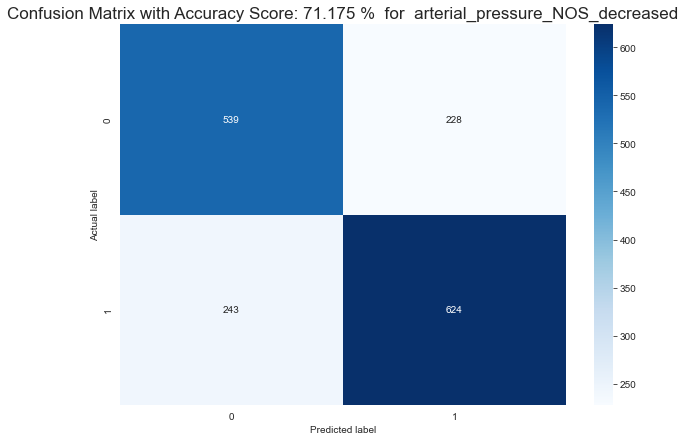

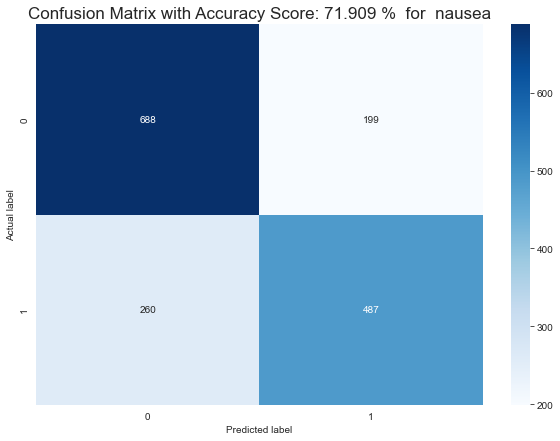

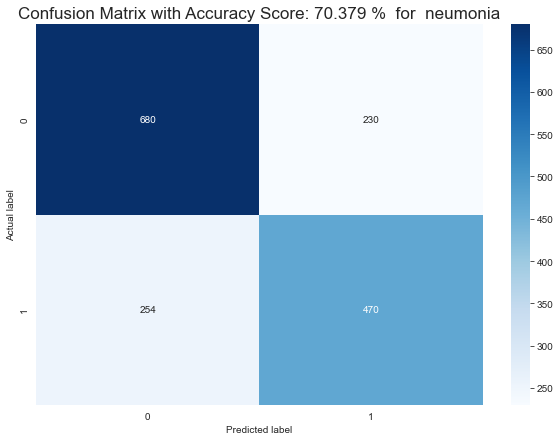

In [39]:
# predict the classes with test data
preds = (model.predict(X_test) > 0.5).astype("int32")
report(y_test, preds, list(Y.columns))

In [40]:
y_test[:9,:]

array([[1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=int32)

In [41]:
preds[:9,:]

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1]], dtype=int32)